In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from env import host, user, password
import acquire
import wrangle
import prepare
import cluster



import warnings
warnings.filterwarnings("ignore")

## Bring in Data from CSV

In [2]:
df = pd.read_csv('zillow_df.csv')

In [3]:
df = df.drop(df.columns[0], axis=1)

### Added in bed bath ratio

In [4]:
df['bed_bath_ratio'] = df.bedroomcnt/df.bathroomcnt

## Define X and y variables

In [5]:
X = df[['longitude', 'latitude', 'age', 'month',
        'square_footage', 'lot_size', 'house_value',
        'land_value', 'full_value', 'tax_rate', 'roomcnt',
        'Los_Angeles', 'Orange', 'Ventura', 'bed_bath_ratio', 'bathroomcnt']]
y = df[['logerror']]

## Split and Scale data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 121)

In [7]:
scaler = MinMaxScaler(copy=True, feature_range=(0,1)).fit(X_train)

train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns.values).set_index([X_train.index.values])

test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns.values).set_index([X_test.index.values])

train_scaled.head()

,longitude,latitude,age,month,square_footage,lot_size,house_value,land_value,full_value,tax_rate,roomcnt,Los_Angeles,Orange,Ventura,bed_bath_ratio,bathroomcnt
21711,0.157109,0.607455,0.031250,0.250,0.056347,0.000971,0.016757,0.003120,0.006246,0.029456,0.4,0.0,0.0,1.0,0.109375,0.088235
72428,0.672587,0.529268,0.307292,1.000,0.047217,0.000355,0.010196,0.001509,0.003413,0.015319,0.0,1.0,0.0,0.0,0.101562,0.058824
20516,0.713434,0.482563,0.437500,0.250,0.026790,0.001023,0.009455,0.003694,0.005455,0.015570,0.0,1.0,0.0,0.0,0.062500,0.058824
42112,0.783232,0.490910,0.166667,0.625,0.032001,0.007152,0.010826,0.000849,0.002873,0.017562,0.0,1.0,0.0,0.0,0.062500,0.058824
6853,0.598599,0.310265,0.208333,0.000,0.083829,0.001027,0.010961,0.006271,0.008308,0.015404,0.0,1.0,0.0,0.0,0.088542,0.117647


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76659 entries, 0 to 76658
Data columns (total 18 columns):
longitude         76659 non-null float64
latitude          76659 non-null float64
age               76659 non-null float64
month             76659 non-null int64
bedroomcnt        76659 non-null float64
bathroomcnt       76659 non-null float64
square_footage    76659 non-null float64
lot_size          76659 non-null float64
house_value       76659 non-null float64
land_value        76659 non-null float64
full_value        76659 non-null float64
tax_rate          76659 non-null float64
roomcnt           76659 non-null float64
Los_Angeles       76659 non-null int64
Orange            76659 non-null int64
Ventura           76659 non-null int64
logerror          76659 non-null float64
bed_bath_ratio    76659 non-null float64
dtypes: float64(14), int64(4)
memory usage: 10.5 MB


## Two Feature/Value

In [9]:
cluster_vars = train_scaled[['bed_bath_ratio','square_footage', 'tax_rate']]
cluster_col_name = 'two_feature_value'
centroid_col_names = ['centroid_' + i for i in cluster_vars]

     k         sse
0    2  136.655644
1    3   83.451920
2    4   65.258514
3    5   48.755086
4    6   39.836473
5    7   33.595037
6    8   29.507036
7    9   26.342600
8   10   23.479395
9   11   21.768722
10  12   19.958673
11  13   18.408745
12  14   17.296153
13  15   15.979103
14  16   14.944254
15  17   13.818823
16  18   12.848976
17  19   12.479287


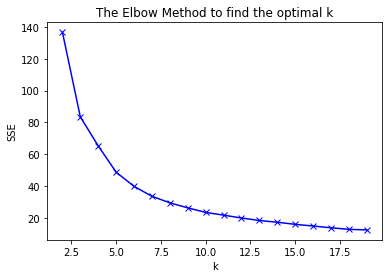

In [10]:
optimal_k = cluster.elbow_method(cluster_vars)

In [11]:
kmeans, train_clusters, test_clusters, cluster_counts = cluster.get_clusters_and_counts(10, ['bed_bath_ratio', 'square_footage', 'tax_rate'], 
                                                                                        'two_feature_value', train_scaled, test_scaled)

In [12]:
X_train, train_scaled, X_test, test_scaled, centroids = cluster.append_clusters_and_centroids(
                                X_train, train_scaled, train_clusters, 
                                X_test, test_scaled, test_clusters, 
                                cluster_col_name, centroid_col_names, kmeans)

In [13]:
X_train

,longitude,latitude,age,month,square_footage,lot_size,house_value,land_value,full_value,tax_rate,roomcnt,Los_Angeles,Orange,Ventura,bed_bath_ratio,bathroomcnt,two_feature_value,centroid_bed_bath_ratio,centroid_square_footage,centroid_tax_rate
21711,-119173645.0,34238098.0,7.0,3,1464.0,7201.0,153720.0,153720.0,307440.0,0.024141,6.0,0,0,1,1.600000,2.5,9,0.099353,0.054807,0.016373
72428,-118183524.0,34122442.0,60.0,9,1266.0,2911.0,93588.0,74869.0,168457.0,0.012600,0.0,1,0,0,1.500000,2.0,9,0.099353,0.054807,0.016373
20516,-118105067.0,34053353.0,85.0,3,823.0,7564.0,86795.0,181819.0,268614.0,0.012805,0.0,1,0,0,1.000000,2.0,5,0.057778,0.039152,0.015373
42112,-117971000.0,34065700.0,33.0,6,936.0,50291.0,99368.0,42578.0,141946.0,0.014431,0.0,1,0,0,1.000000,2.0,5,0.057778,0.039152,0.015373
6853,-118325639.0,33798484.0,41.0,1,2060.0,7592.0,100601.0,307982.0,408583.0,0.012669,0.0,1,0,0,1.333333,3.0,1,0.096894,0.096773,0.015655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30754,-118071760.0,34586675.0,61.0,4,1056.0,7257.0,132794.0,33198.0,165992.0,0.016483,0.0,1,0,0,1.500000,2.0,9,0.099353,0.054807,0.016373
36351,-118337522.0,33783671.0,58.0,5,2220.0,23328.0,369551.0,1478204.0,1847755.0,0.011057,0.0,1,0,0,1.500000,2.0,1,0.096894,0.096773,0.015655
51265,-117996812.0,33723862.0,55.0,6,1390.0,6001.0,86586.0,181689.0,268275.0,0.011759,7.0,0,1,0,2.000000,2.0,0,0.140744,0.038679,0.016918
56584,-118281892.0,34522021.0,52.0,7,3123.0,225070.0,156736.0,13849.0,170585.0,0.012540,0.0,1,0,0,1.666667,3.0,1,0.096894,0.096773,0.015655


## Feature/Age/Value

In [14]:
cluster_vars = train_scaled[['lot_size', 'age', 'full_value']]
cluster_col_name = 'feature/age/value'
centroid_col_names = ['centroid_' + i for i in cluster_vars]

     k         sse
0    2  293.148889
1    3  161.877891
2    4   94.565975
3    5   68.938498
4    6   56.330492
5    7   48.542317
6    8   42.852308
7    9   37.418742
8   10   34.289726
9   11   30.477993
10  12   26.888056
11  13   24.395105
12  14   23.240722
13  15   21.040077
14  16   20.058057
15  17   18.710767
16  18   18.001942
17  19   17.080589


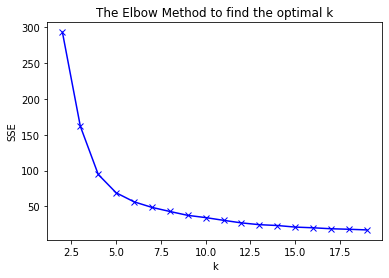

In [15]:
optimal_k = cluster.elbow_method(cluster_vars)

In [16]:
kmeans, train_clusters, test_clusters, cluster_counts = cluster.get_clusters_and_counts(10, ['lot_size', 'age', 'full_value'], 
                                                                                        'feature/age/value', train_scaled, test_scaled)

In [17]:
X_train, train_scaled, X_test, test_scaled, centroids = cluster.append_clusters_and_centroids(
                                X_train, train_scaled, train_clusters, 
                                X_test, test_scaled, test_clusters, 
                                cluster_col_name, centroid_col_names, kmeans)

In [18]:
X_train

,longitude,latitude,age,month,square_footage,lot_size,house_value,land_value,full_value,tax_rate,...,bed_bath_ratio,bathroomcnt,two_feature_value,centroid_bed_bath_ratio,centroid_square_footage,centroid_tax_rate,feature/age/value,centroid_lot_size,centroid_age,centroid_full_value
21711,-119173645.0,34238098.0,7.0,3,1464.0,7201.0,153720.0,153720.0,307440.0,0.024141,...,1.600000,2.5,9,0.099353,0.054807,0.016373,3,0.003170,0.047154,0.015997
72428,-118183524.0,34122442.0,60.0,9,1266.0,2911.0,93588.0,74869.0,168457.0,0.012600,...,1.500000,2.0,9,0.099353,0.054807,0.016373,8,0.001242,0.326039,0.007893
20516,-118105067.0,34053353.0,85.0,3,823.0,7564.0,86795.0,181819.0,268614.0,0.012805,...,1.000000,2.0,5,0.057778,0.039152,0.015373,5,0.000986,0.473076,0.010666
42112,-117971000.0,34065700.0,33.0,6,936.0,50291.0,99368.0,42578.0,141946.0,0.014431,...,1.000000,2.0,5,0.057778,0.039152,0.015373,1,0.005673,0.151083,0.009008
6853,-118325639.0,33798484.0,41.0,1,2060.0,7592.0,100601.0,307982.0,408583.0,0.012669,...,1.333333,3.0,1,0.096894,0.096773,0.015655,4,0.007550,0.209708,0.008309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30754,-118071760.0,34586675.0,61.0,4,1056.0,7257.0,132794.0,33198.0,165992.0,0.016483,...,1.500000,2.0,9,0.099353,0.054807,0.016373,8,0.001242,0.326039,0.007893
36351,-118337522.0,33783671.0,58.0,5,2220.0,23328.0,369551.0,1478204.0,1847755.0,0.011057,...,1.500000,2.0,1,0.096894,0.096773,0.015655,0,0.003350,0.272598,0.008870
51265,-117996812.0,33723862.0,55.0,6,1390.0,6001.0,86586.0,181689.0,268275.0,0.011759,...,2.000000,2.0,0,0.140744,0.038679,0.016918,0,0.003350,0.272598,0.008870
56584,-118281892.0,34522021.0,52.0,7,3123.0,225070.0,156736.0,13849.0,170585.0,0.012540,...,1.666667,3.0,1,0.096894,0.096773,0.015655,0,0.003350,0.272598,0.008870


## Month/Value/Feature

In [20]:
cluster_vars = train_scaled[['month', 'house_value', 'bathroomcnt']]
cluster_col_name = 'month/value/feature'
centroid_col_names = ['centroid_' + i for i in cluster_vars]

     k          sse
0    2  1482.622929
1    3   746.043152
2    4   500.389813
3    5   387.409809
4    6   331.192599
5    7   282.465229
6    8   246.291998
7    9   211.364000
8   10   185.043862
9   11   166.806060
10  12   153.430298
11  13   144.854203
12  14   131.994233
13  15   122.849961
14  16   115.471757
15  17   108.311266
16  18    98.739870
17  19    94.886436


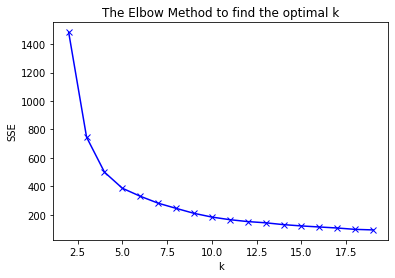

In [21]:
optimal_k = cluster.elbow_method(cluster_vars)

In [22]:
kmeans, train_clusters, test_clusters, cluster_counts = cluster.get_clusters_and_counts(10, ['month', 'house_value', 'bathroomcnt'], 
                                                                                        'month/value/feature', train_scaled, test_scaled)

In [23]:
X_train, train_scaled, X_test, test_scaled, centroids = cluster.append_clusters_and_centroids(
                                X_train, train_scaled, train_clusters, 
                                X_test, test_scaled, test_clusters, 
                                cluster_col_name, centroid_col_names, kmeans)

In [24]:
X_train

,longitude,latitude,age,month,square_footage,lot_size,house_value,land_value,full_value,tax_rate,...,centroid_square_footage,centroid_tax_rate,feature/age/value,centroid_lot_size,centroid_age,centroid_full_value,month/value/feature,centroid_month,centroid_house_value,centroid_bathroomcnt
21711,-119173645.0,34238098.0,7.0,3,1464.0,7201.0,153720.0,153720.0,307440.0,0.024141,...,0.054807,0.016373,3,0.003170,0.047154,0.015997,8,2.500000e-01,0.019618,0.076138
72428,-118183524.0,34122442.0,60.0,9,1266.0,2911.0,93588.0,74869.0,168457.0,0.012600,...,0.054807,0.016373,8,0.001242,0.326039,0.007893,7,1.000000e+00,0.020698,0.077570
20516,-118105067.0,34053353.0,85.0,3,823.0,7564.0,86795.0,181819.0,268614.0,0.012805,...,0.039152,0.015373,5,0.000986,0.473076,0.010666,8,2.500000e-01,0.019618,0.076138
42112,-117971000.0,34065700.0,33.0,6,936.0,50291.0,99368.0,42578.0,141946.0,0.014431,...,0.039152,0.015373,1,0.005673,0.151083,0.009008,6,6.250000e-01,0.017399,0.067428
6853,-118325639.0,33798484.0,41.0,1,2060.0,7592.0,100601.0,307982.0,408583.0,0.012669,...,0.096773,0.015655,4,0.007550,0.209708,0.008309,2,2.609024e-14,0.020009,0.076654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30754,-118071760.0,34586675.0,61.0,4,1056.0,7257.0,132794.0,33198.0,165992.0,0.016483,...,0.054807,0.016373,8,0.001242,0.326039,0.007893,0,3.750000e-01,0.019764,0.074880
36351,-118337522.0,33783671.0,58.0,5,2220.0,23328.0,369551.0,1478204.0,1847755.0,0.011057,...,0.096773,0.015655,0,0.003350,0.272598,0.008870,5,5.000000e-01,0.018299,0.072259
51265,-117996812.0,33723862.0,55.0,6,1390.0,6001.0,86586.0,181689.0,268275.0,0.011759,...,0.038679,0.016918,0,0.003350,0.272598,0.008870,6,6.250000e-01,0.017399,0.067428
56584,-118281892.0,34522021.0,52.0,7,3123.0,225070.0,156736.0,13849.0,170585.0,0.012540,...,0.096773,0.015655,0,0.003350,0.272598,0.008870,1,7.500000e-01,0.018449,0.072837


In [ ]:
# get summary stats of the dollar per sqft to possibly use one/some of these as new variables
cluster_stats = X_train.groupby(['area_cluster_id', 'size_cluster_id'])['structure_dollar_per_sqft'].describe().reset_index()
scaled_cluster_stats = train_scaled.groupby(['area_cluster_id', 'size_cluster_id'])['structure_dollar_per_sqft'].describe().reset_index()

cluster_stats.head()